This code is basically copied from this blog: https://blog.keras.io/building-autoencoders-in-keras.html by Francois Chollet 

In [13]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard

In [5]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

In [22]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

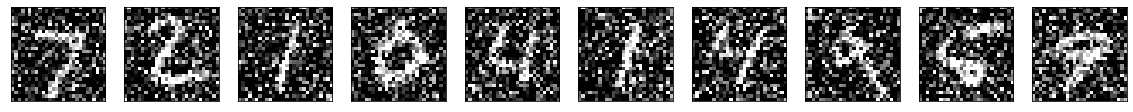

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10, #100
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1755 - val_loss: 0.1196
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1180 - val_loss: 0.1148
Epoch 3/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1112 - val_loss: 0.1077
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1075 - val_loss: 0.1049
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1055 - val_loss: 0.1058
Epoch 6/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1039 - val_loss: 0.1017
Epoch 7/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1030 - val_loss: 0.1057
Epoch 8/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1021 - val_loss: 0.0998
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1014 - val_loss: 0.1004
Epoch

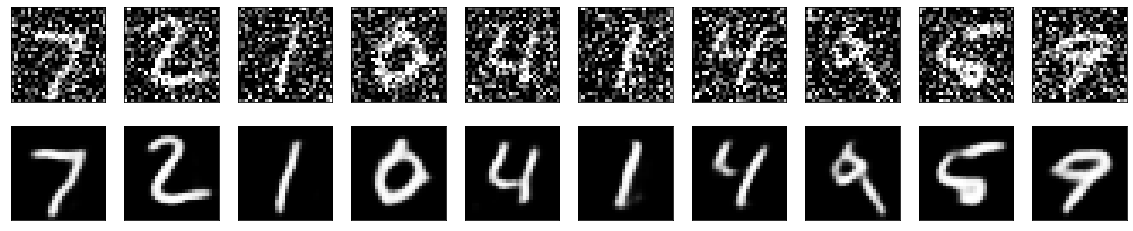

In [19]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()